<a href="https://colab.research.google.com/github/Petek1010/ML_MINST/blob/master/KerasAndTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operating with tensors in TensorFlow

In [ ]:
import tensorflow as tf

x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


`tf.ones(shape = (2,1))` is equivalent to `np.ones(shape=(2,1))`

How to update tensor, with new values:

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,3)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.15687378, -2.2486928 , -0.14686143],
       [ 0.48487598,  0.3152309 ,  1.8660793 ],
       [-0.270596  ,  0.13947172, -0.33475873]], dtype=float32)>


In [ ]:
v[1,1].assign([3])
print(v)


<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.15687378, -2.2486928 , -0.14686143],
       [ 0.48487598,  3.        ,  1.8660793 ],
       [-0.270596  ,  0.13947172, -0.33475873]], dtype=float32)>


Dot product between two tensors:

In [ ]:
a = tf.Variable(initial_value=tf.random.normal(shape=(2,2)))
b = tf.Variable(initial_value=tf.random.normal(shape=(2,2)))

e = tf.matmul(a,b)
print('Tensor e = ',e)

a =  <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.2798041 , -0.40780962],
       [-0.16488308, -0.41203988]], dtype=float32)> b =  <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.3477884, -0.8714195],
       [ 1.3582265, -1.243673 ]], dtype=float32)> e =  tf.Tensor(
[[-0.6512105   0.26335508]
 [-0.5022991   0.6561252 ]], shape=(2, 2), dtype=float32)


Using `GradientTape` to calculate gradient using a derivative

In [ ]:
input_var = tf.Variable(initial_value=3)
print('Input variable is: ', input_var)

with tf.GradientTape() as tape:
  result = tf.square(input_var)
  print('Result: ', result)

gradient = tape.gradient(result, input_var)

print('Gradient is: ', gradient)


Input variable is:  <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>
Result:  tf.Tensor(9, shape=(), dtype=int32)
Gradient is:  None


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

# Implementation of linear classifier from scratch

We'll generate two classes of points from a random distribution, with a specific **covariance matrix** (shape of cloud of points) and a **specific mean** (position of the cloud on the plane). We will use the same covariance matrix but different mean values for negative samples and positive samples. In the end we stacked both sample arrays into a single array `inputs` with shape `(2000, 2)`:

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class

)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

Now we generate corresponding **target labels**, an array of zeroes and ones, stacked on each other (1000 ones on top of 1000 zeros). In the end we want to classify which point on 2D plane is part of class with a value of 0 and which with a value of 1.

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))

Plotting our input data and the targets (0 or 1):

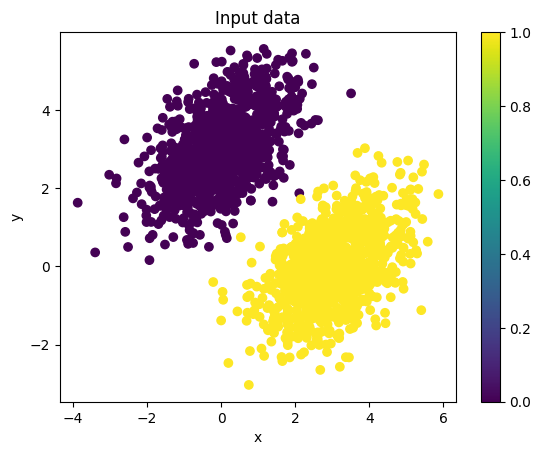

In [ ]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.title('Input data')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

Now we create a linear classifier that can learn to seperate these two clouds of dots. A linear classificator is an affine transformation `prediction = W ⋅ input + b`, trained to **minimize the square of the difference between predictions and the targets**. First we initialize variables `W` and `b`, tensors with random values and with zeros respectively. We also set dimensions for input data, which is 2 for points on 2D plane and we set 1 for output dimensions since a score can be eather 1 or 0, a scalar.

In [ ]:
input_dim = 2 # 2D points
output_dim = 1 # a single score; eather close to 0 or to 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(output_dim))

**Forward pass** function (`W ⋅ input + b`):

In [ ]:
def model(inputs):
  return tf.matmul(inputs, W) + b

**Loss function**. Calculating the square of difference between targets and predictions:

In [ ]:
def square_loss(targets, predictions):
  # tensor containing per sample losses
  per_sample_losses = tf.square(targets - predictions)
  # Average scores into a single scalar loss value
  return tf.reduce_mean(per_sample_losses)

**Training step** function, which receives some training data and updates the weights W and b so as to minimize the loss on data:

In [ ]:
#learning_rate = 0.1

def training_step(inputs, targets, learning_rate=0.1):
  with tf.GradientTape() as tape:
    predictions = model(inputs) # Forwrd pass inside a gradient scope
    loss = square_loss(predictions, targets) # Loss function
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  # Update weights:
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

**The batch training** loop:

In [ ]:
  loss_array = []

  for step in range(40):
    loss = training_step(inputs,targets)
    loss_array.append(loss)
    # print(f"Loss at the step {step}: {loss:.4f}")


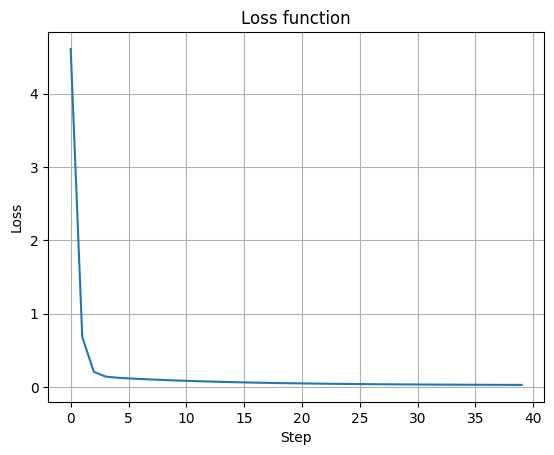

In [ ]:
plt.plot(loss_array)
plt.title('Loss function')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Because our targets are zeros and ones, a given input point will be classified as “0” if its prediction value is below 0.5, and as “1” if it is above 0.5. We can plot the prediction line, since we are in 2D plane: `w1 * x + w2 * y + b = 0.5`  Plot of classified training data points:

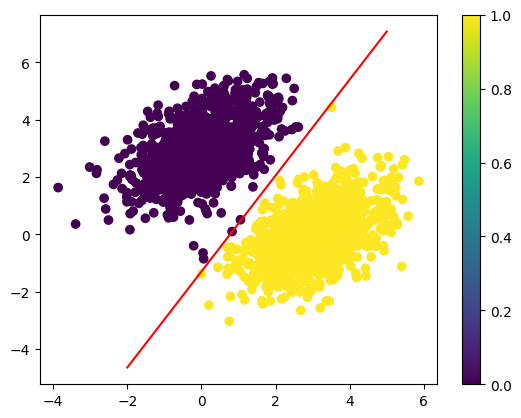

In [ ]:
predictions = model(inputs)

x = np.linspace(-2, 5, 100)
line = (0.5 - b - (W[0]*x))/W[1]


plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.plot(x, line, 'r')
plt.colorbar()
plt.show()

# Anatomy of neural networks

The base layer class in Keras. The implementation of Dense layer as a Layer subclass

In [1]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    # Weight creation
    input_dim = input_shape[-1]
    # add_weight is a shortcut for: tf.Variable(tf.random.uniform(w_shape))
    self.W = self.add_weight(shape=(input_dim, self.units),
                             initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,),
                             initializer="zeros")
  def call(self, inputs):
    # Forward pass computation
      y = tf.matmul(inputs, self.W) + self.b
      if self.activation is not None:
        y = self.activation(y)
      return y


Tensor shape transformation from 495 to 32:

In [16]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2,459))
output_tensor = my_dense(input_tensor)

print('Input tensor shape: ', input_tensor.shape)
print('Output tensor shape: ', output_tensor.shape)


Input tensor shape:  (2, 459)
Output tensor shape:  (2, 32)


The following is the same as its written above:

In [17]:
from tensorflow.keras import layers

layer = layers.Dense(units=32, activation='relu')

And using more layers with automatic shape inference. We are using Sequiential model as a simple stack of layers:

In [18]:
model = keras.Sequential([
  SimpleDense(32, activation=tf.nn.relu),
  SimpleDense(64, activation=tf.nn.relu),
  SimpleDense(32, activation=tf.nn.relu),
  SimpleDense(10, activation=tf.nn.softmax)
])

The `compile()` method configures the trainning process:


*   *Loss function* (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand
*   *Optimizer*—Determines how the network will be updated based on the loss func-
tion. It implements a specific variant of stochastic gradient descent (SGD).
* *Metrics*—The measures of success you want to monitor during training and vali-
dation, such as classification accuracy. Unlike the loss, training will not optimize directly for these metrics. As such, metrics don’t need to be differentiable.



In [ ]:
model = keras.Sequential([keras.layers.Dense(1)]) # Linear classifier
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

The `fit()` method implements the trainning loop itself. Key arguments:


*   The *data* (inputs and targets) to train on.
*   The number of *epochs* to train for: how many times the training loop should iterate over the data passed.
*   The *batch size* to use within each epoch of mini-batch gradient descent: the
number of training examples considered to compute the gradients for one
weight update step.




`history = model.fit(inputs,targets,epochs=5,batch_size=128)`








Interferance, making predictions on new data:

In [ ]:
predictions = model.predict(new_inputs, batch_size=128)